## Tensorflow for Timeseries

In [1]:
!nvidia-smi -L


/usr/bin/zsh: /home/lovecrush/miniconda3/lib/libtinfo.so.6: no version information available (required by /usr/bin/zsh)
GPU 0: NVIDIA GeForce GTX 1650 (UUID: GPU-72ac3021-d1f7-0394-e845-34821fc5a1c7)


### *Get the data*

In [ ]:
# Download Bitcoin historical data from GitHub 
# Note: you'll need to select "Raw" to download the data in the correct format
# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv 

In [3]:
import pandas as pd
# Parse dates and set date columns to index
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])

df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
# Only want the closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


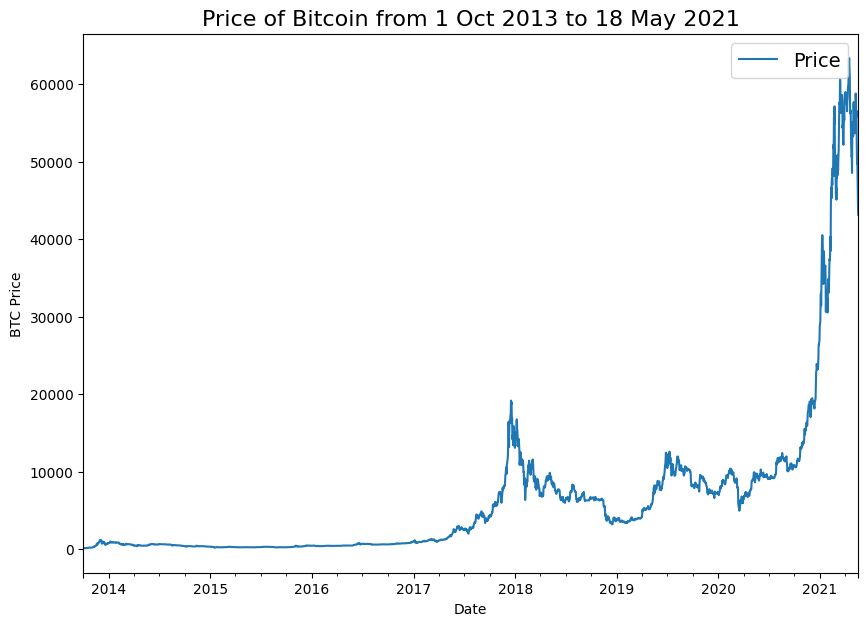

In [6]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

In [ ]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [8]:
# Wrong way to make train/test sets for time series
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((2229,), (558,), (2229,), (558,))

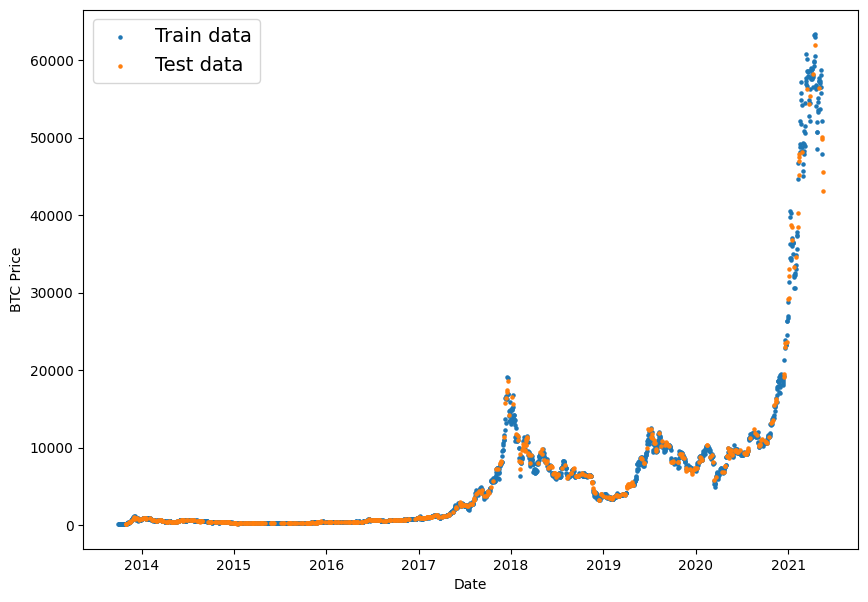

In [9]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

### *Format data part 1*

In [10]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(bitcoin_prices))

# Create train data splits (everything before split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data  splits (everything after split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

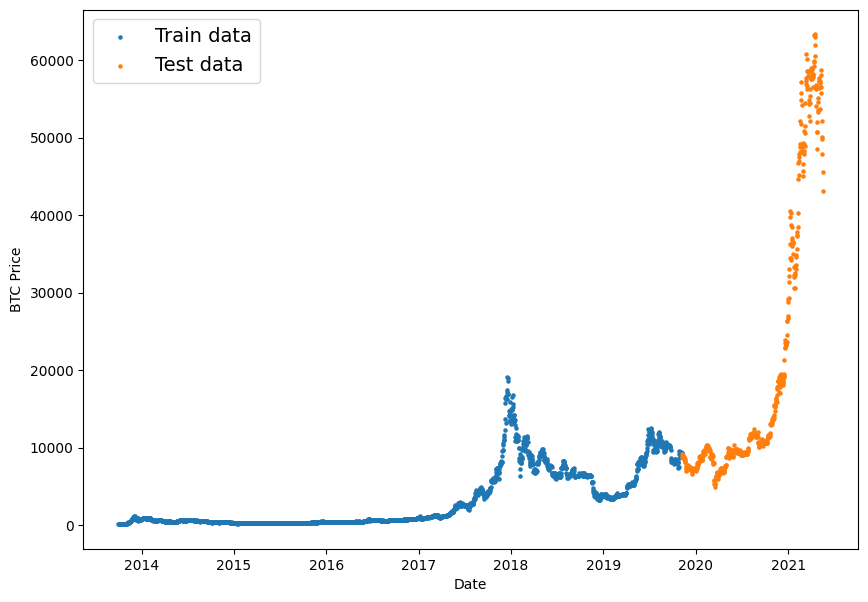

In [11]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();


In [12]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

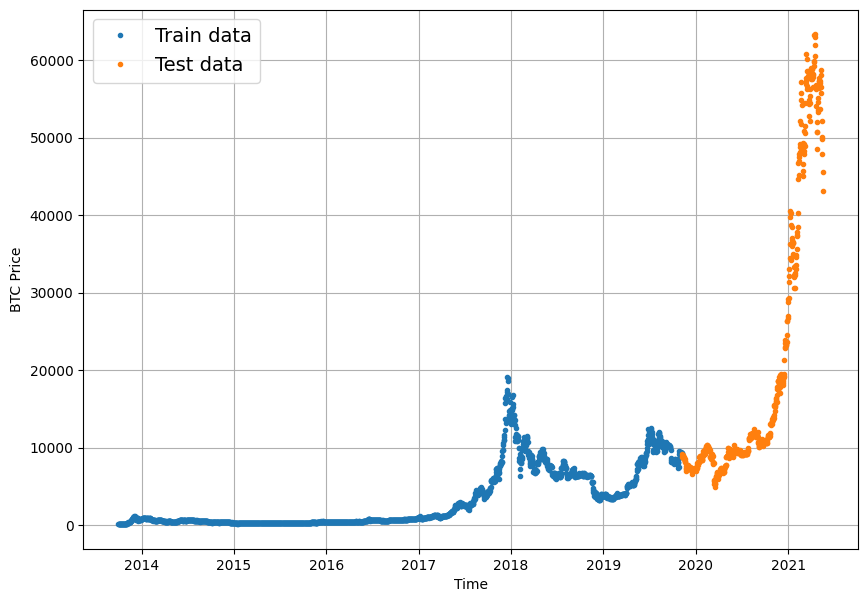

In [13]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

### *Model 0: Naive Forecast*

In [14]:
# Cerate a naive forecast
naive_forecast = y_test[:-1]                        # naive forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:]           # View first ten and last 10

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

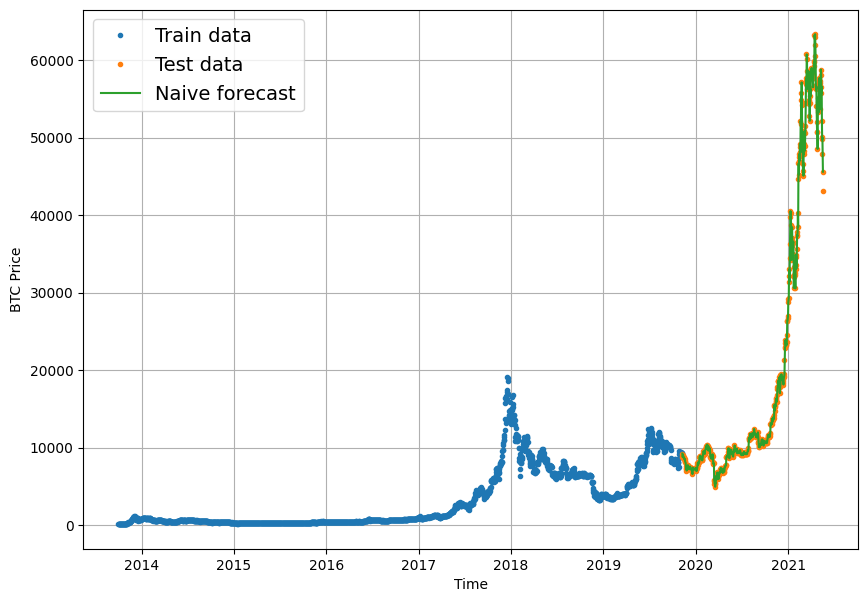

In [15]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

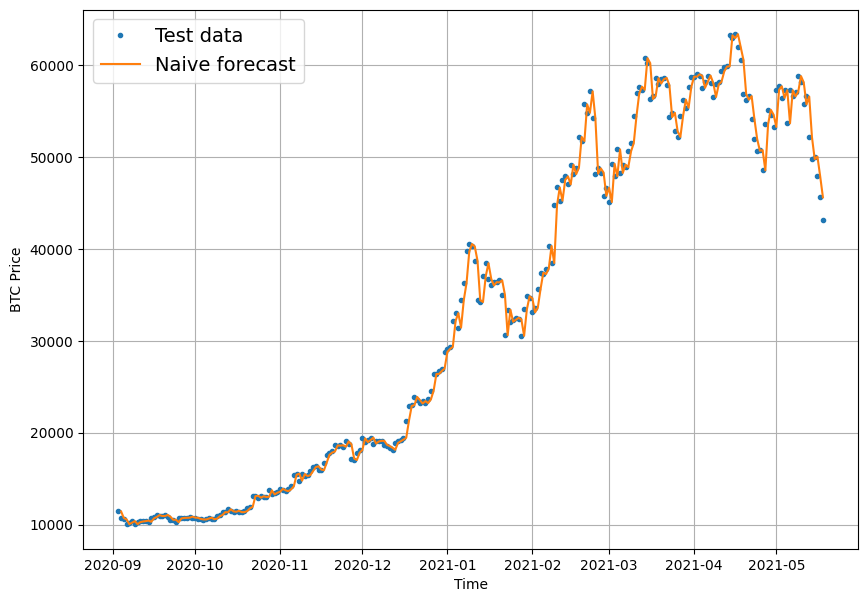

In [16]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps 
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

### *Evaluate a timeseries model*

In [57]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import optimizers
from keras import losses
from keras import activations
from keras import callbacks
from keras import utils
from keras import metrics
from keras import applications
from keras import regularizers
from keras import preprocessing
from keras import models

In [19]:
def mean_absolute_scaled_error(y_true, y_pred):
    """Implement MASE (assuming no seasonality of data  )"""
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))

    # Find MAE of native forecast (no seasonality)
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_pred[:-1]))      #our seasonality is 1 day (hence the shift of 1 day)

    return mae / mae_naive_no_season

In [34]:
def evaluate_pred(y_true, y_pred):
    # make sure float32 (for metrics calculation)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various metrics
    mae = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
    rmse = tf.sqrt(mse)
    mape = metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    return {"mae" : mae.numpy(),
            "mse" : mse.numpy(),
            "rmse": rmse.numpy(),
            "mape": mase.numpy()}

In [35]:
naive_results = evaluate_pred(y_true=y_test[1:],
                              y_pred=naive_forecast)
naive_results

{'mae': np.float32(567.9802),
 'mse': np.float32(1147547.0),
 'rmse': np.float32(1071.2362),
 'mape': np.float32(0.69212395)}

In [36]:
tf.reduce_mean(y_test).numpy()

np.float64(20056.632963737222)

### *Windowing dataset*

In [37]:
HORIZON = 1             # predict one step at a time
WINDOW_SIZE = 7         # use  a week worth of time steps to predict the horizon

In [38]:
# Create a function  to label windowed data
def  get_labelled_windows(x, horizon=1):
    # Create labels for windowed dataset.
    return x[:, :-horizon], x[:, -horizon:]

In [39]:
# Test out the window labelling function
test_window , test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")


Window: [1 2 3 4 5 6 7] -> Label: 8


In [42]:
import numpy as np

# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [43]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [44]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [45]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


### *Turning windows into training and test sets*

In [46]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [47]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [48]:
test_window
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [49]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

### *Make a model checkpoint*

In [54]:
import os

# Create a function to implement a ModelCheckPoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
    return callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name + ".keras"),      # create a file path to save model
                                     verbose=False,
                                     save_best_only=True)                               # save on;y best model to file


### *Model 1: Dense model (window = 7, horizon = 1)*

In [55]:
tf.random.set_seed(16)

# Construct a model
model_1 = keras.Sequential([
    layers.Dense(128, activation=activations.relu),
    layers.Dense(HORIZON, activation=activations.linear)    # Linear activation is the same as having no activation
], name="Model_1_Dense")

# Compile model
model_1.compile(loss=losses.mean_absolute_error,
                optimizer=optimizers.Adam(),
                metrics=[metrics.mean_absolute_error])

# Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=True,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100


I0000 00:00:1739929513.874607    9710 service.cc:148] XLA service 0x7b4228004a90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739929513.874998    9710 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-02-19 08:45:13.959007: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1739929514.389537    9710 cuda_dnn.cc:529] Loaded cuDNN version 90300


 8/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3672.9790 - mean_absolute_error: 3672.9790

I0000 00:00:1739929515.706071    9710 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 242ms/step - loss: 3007.8853 - mean_absolute_error: 3007.8853 - val_loss: 1476.3055 - val_mean_absolute_error: 1476.3055
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 458.9017 - mean_absolute_error: 458.9017 - val_loss: 2221.2617 - val_mean_absolute_error: 2221.2617
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 274.2553 - mean_absolute_error: 274.2553 - val_loss: 1294.9966 - val_mean_absolute_error: 1294.9966
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 197.9926 - mean_absolute_error: 197.9926 - val_loss: 1164.7277 - val_mean_absolute_error: 1164.7277
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 185.9759 - mean_absolute_error: 185.9759 - val_loss: 1057.4733 - val_mean_absolute_error: 1057.4733
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 178.7999 - mean_absolute_error: 178.7999 - val_loss: 1004.0099 - val_mean_absolute_error: 1004.0099
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/st

In [56]:
model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 287.9049 - mean_absolute_error: 287.9049


[573.0872192382812, 573.0872192382812]

### *Load the best model in model_experiments*

In [59]:
model_1 = models.load_model("model_experiments/Model_1_Dense.keras")
model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 285.5662 - mean_absolute_error: 285.5662


[570.4227905273438, 570.4227905273438]

- *Much better!*

### *Making forecasts with a model (on the test dataset)*

In [60]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model 
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [62]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8862.625, 8764.481, 9024.122, 8804.788, 8742.236, 8753.887,
        8669.6  , 8538.866, 8454.687, 8526.133], dtype=float32)>)

In [64]:
# Evaluate preds
model_1_results = evaluate_pred(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': np.float32(570.42285),
 'mse': np.float32(1177334.5),
 'rmse': np.float32(1085.0504),
 'mape': np.float32(0.68688756)}

In [65]:
naive_results

{'mae': np.float32(567.9802),
 'mse': np.float32(1147547.0),
 'rmse': np.float32(1071.2362),
 'mape': np.float32(0.69212395)}

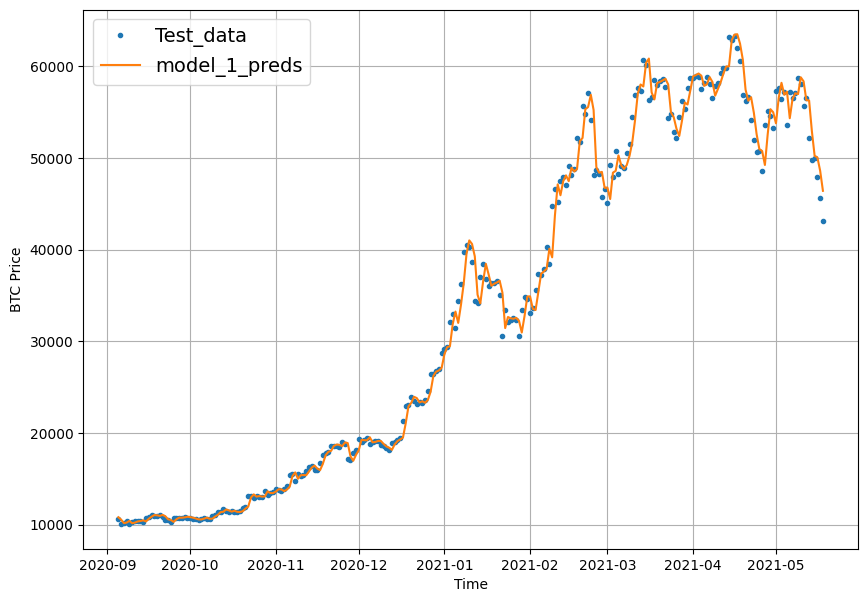

In [66]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

### *Model 2: Dense model (window = 30, horizon = 1)*

In [67]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

In [68]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [69]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [70]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=True,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [71]:
# Evaluate model 2 preds
model_2.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 360.8087


692.2369384765625

In [73]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)
                           

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [75]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_pred(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': np.float32(692.2369),
 'mse': np.float32(1518516.2),
 'rmse': np.float32(1232.2809),
 'mape': np.float32(0.78450894)}

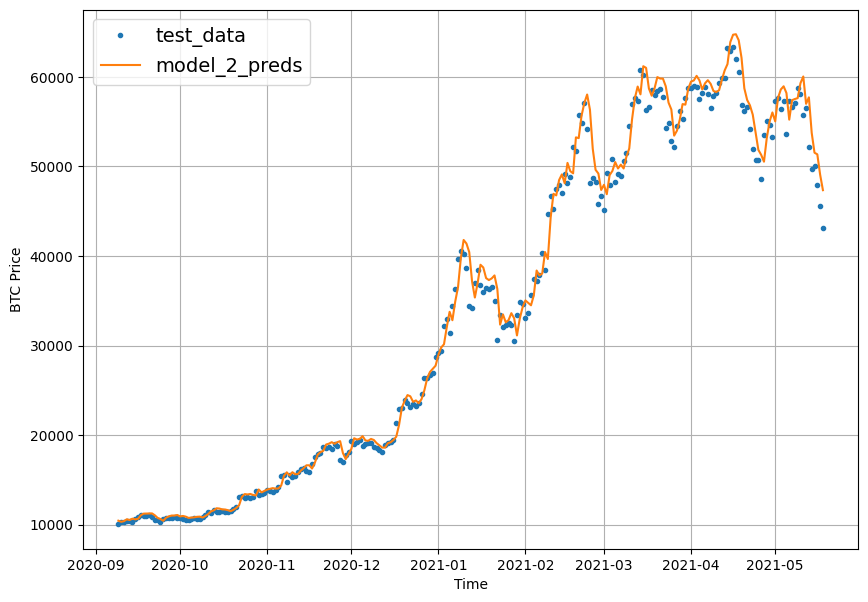

In [76]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds") 

### *Model 3: Dense model (window = 30, horizon = 7)*

In [77]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [78]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [79]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 204ms/step - loss: 2932.1089 - val_loss: 4613.2217
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 652.6682 - val_loss: 2458.3560
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 469.8876 - val_loss: 2174.4133
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 426.2955 - val_loss: 1976.2362
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 392.9281 - val_loss: 1871.3198
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 373.7041 - val_loss: 1745.3230
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 360.6796 - val_loss: 1719.6929
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 345.1393 - val_loss: 1618.0665
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 333.9327 - val_loss: 1597.5436
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 326.3568 - val_loss: 1589.3157
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 319.2602 - val_loss: 1564

In [81]:
# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense.keras")
model_3.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 612.7051


1223.64208984375

In [82]:
# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9296.547, 9429.735, 9210.221, 9303.733, 9662.669, 9385.289,
        9245.784],
       [9030.973, 9099.162, 8909.371, 9150.968, 9207.197, 9183.493,
        8903.136],
       [8965.38 , 8919.797, 8767.156, 9031.548, 8943.379, 9157.456,
        8906.929],
       [9285.918, 9113.524, 8914.425, 9268.191, 9119.775, 9395.812,
        9290.741],
       [9033.495, 8903.218, 8796.473, 8902.327, 8839.102, 8952.35 ,
        8995.276]], dtype=float32)>

In [83]:
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_pred(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([ 568.7819  ,  317.92996 ,  284.74985 ,  571.7464  ,  363.11508 ,
         415.69662 ,  537.12415 ,  565.7926  ,  466.5899  ,  487.65436 ,
         771.8846  ,  764.1473  ,  807.5782  ,  831.4737  ,  448.37668 ,
         221.08586 ,  234.02791 ,  341.64682 ,  297.0018  ,  272.18442 ,
         139.91637 ,  156.35707 ,  259.16928 ,  262.74274 ,  165.51723 ,
         105.664345,  121.16134 ,  200.52686 ,  139.04129 ,  182.22726 ,
         255.22691 ,  270.36627 ,  265.10873 ,  254.89746 ,  227.19308 ,
         233.88435 ,  361.7359  ,  258.8815  ,  222.12361 ,  227.08461 ,
         572.7552  ,   88.07617 ,   63.158344,   97.44915 ,  128.69301 ,
          96.41553 ,   38.805805,   91.51591 ,   99.14788 ,   74.17745 ,
         136.7318  ,  164.40053 ,  141.6333  ,  136.30588 ,  237.81194 ,
         351.9094  ,  581.1089  ,  440.06625 ,  465.11154 ,  598.65924 ,
         321.24484 ,  213.33029 ,  273.94803 ,  434.23813 ,  305.25027 ,
         442.12347 ,  503.45062 ,  420.06363

### *Make our evaluation function work larger horizons*

In [88]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = metrics.mean_absolute_error(y_true, y_pred)
  mse = metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [89]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': np.float32(1223.642),
 'mse': np.float32(5252903.0),
 'rmse': np.float32(1407.2788),
 'mape': np.float32(5.4769425),
 'mase': np.float32(0.881417)}

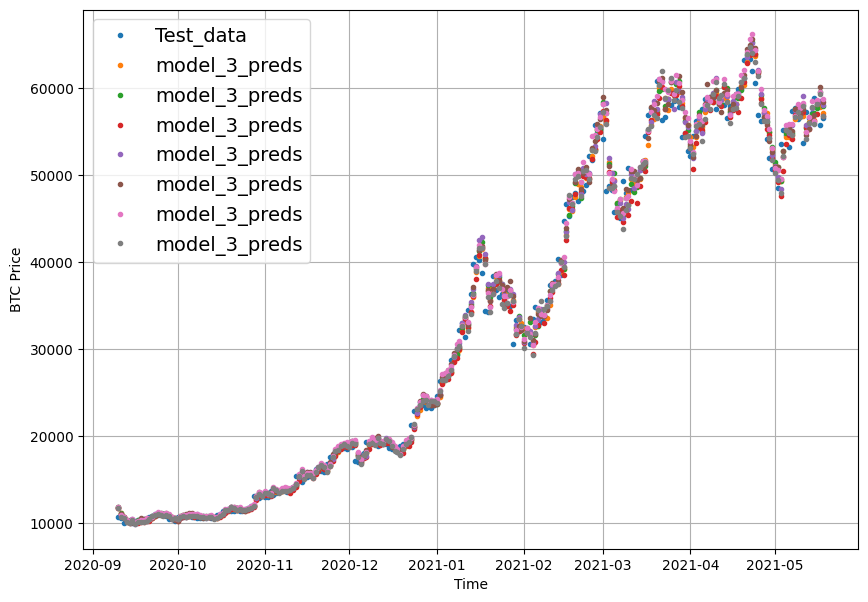

In [90]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

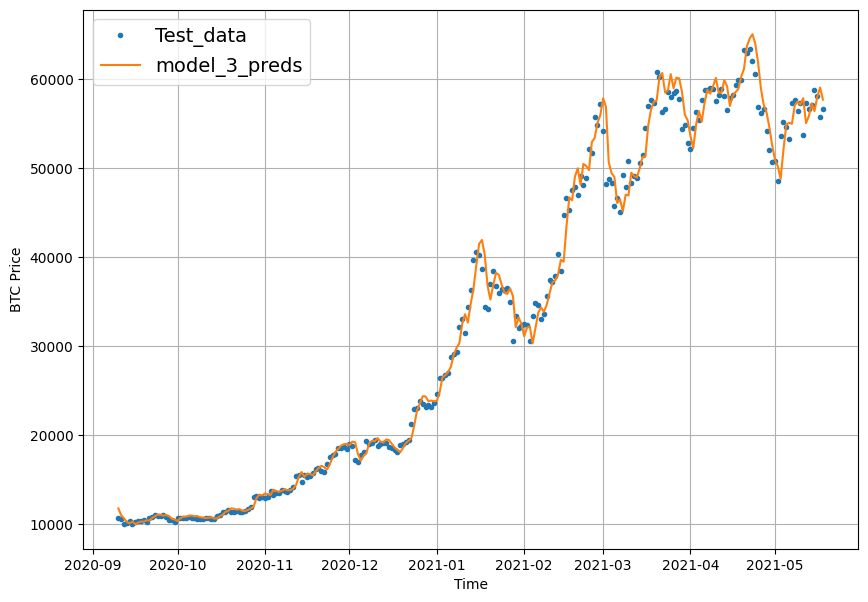

In [91]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 format="-",
                 start=offset, 
                 label="model_3_preds")

### *Which of our models is performing best so far*

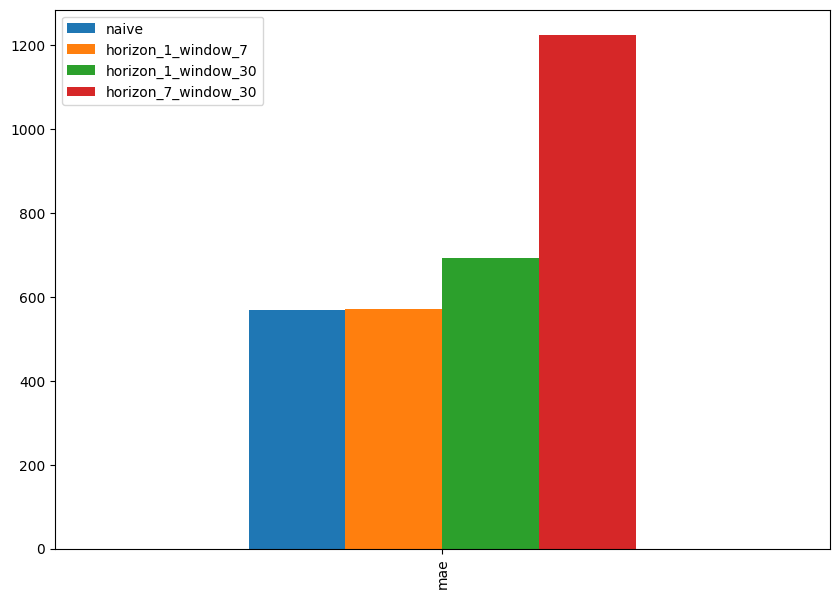

In [92]:
pd.DataFrame({"naive": naive_results["mae"], 
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

### *Model 4: Conv1D*

In [93]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [94]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [95]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [96]:
# Check data sample shapes
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [97]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim) 
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [98]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [99]:
model_4.summary()

Model: "model_4_conv1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)               │ (None, 1, 7)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 1, 128)         │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1, 1)           │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,213 (55.52 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,476 (37.02 KB)

### *Model 5: RNN (LSTM)*

In [104]:
tf.random.set_seed(42)

# # Let's build an LSTM model with the Functional API
# inputs = layers.Input(shape=(WINDOW_SIZE))
# x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# # print(x.shape)
# # x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
# x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# # print(x.shape)
# # Add another optional dense layer (you could add more of these to see if they improve model performance)
# # x = layers.Dense(32, activation="relu")(x)
# output = layers.Dense(HORIZON)(x)
# model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# # Compile model
# model_5.compile(loss="mae",
#                 optimizer=tf.keras.optimizers.Adam())

# # Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554 
# model_5.fit(train_windows,
#             train_labels,
#             epochs=100,
#             verbose=0,
#             batch_size=128,
#             validation_data=(test_windows, test_labels),
#             callbacks=[create_model_checkpoint(model_name=model_5.name)])

### *Multivariate time series*

In [105]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")